In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from IPython.display import Image

import glob
import warnings  
warnings.filterwarnings('ignore')

=================================================================================================================

In [55]:
def splitData(data):
    """
        This function reads the entire file and splits the data by State and creates one input file for every state.
        These files are saved into a sub - directory /inputs
        These files are then used as an input to the VAR model
    """
    for state, df in data.groupby('State'):
        df = df.sort_values('Year')
        df = df.set_index(['Year'], drop=True)
        df.to_csv("C:/Users/pakan/590PR_finalProject/inputs/"+state+".csv")
    
def getOutput(df,fname):
    """
        This function reads the  file from the /inputs sub - directory 
        The model is a Vector Autoregression (VAR) model 
        It is an extension of univariate autoregression model to multivariate time series data
        The output is written to individual files (based on state) in the /outputs sub-directory
    """ 
    state = fname
    df.Year = pd.to_datetime(df.Year, format='%Y')
    df.index = df.Year
    df = df.drop(['Year','State'], axis=1)
    
    df['Smoke everyday']=df['Smoke everyday']*100
    df['Smoke some days']=df['Smoke some days']*1000
    df['Former smoker']=df['Former smoker']*100
    df['Never smoked']=df['Never smoked']*100
    
    model = VAR(df)
    model.fit()
    results = model.fit()
    
    pred = results.forecast(results.y, steps=9)
    pred_df = pd.DataFrame(pred.astype(int))
    dates = ['2011-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01','2017-01-01', '2018-01-01','2019-01-01']
    pred_df['Year'] = dates
    pred_df.Year = pd.to_datetime(pred_df.Year, format='%Y-%m-%d')
    pred_df = pred_df.set_index(['Year'], drop=True)
    pred_df.columns = ['Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked']

    df = df.append(pred_df)
    
    df['Smoke everyday']=df['Smoke everyday']/100
    df['Smoke some days']=df['Smoke some days']/1000
    df['Former smoker']=df['Former smoker']/100
    df['Never smoked']=df['Never smoked']/100
    
    df.insert(0,'State',state)

    df.to_csv("C:/Users/pakan/590PR_finalProject/outputs/"+fname+".csv")
    
    
def savePlots(df,dname):
    """
        This function creates plots for the attributes and saves them in the sub directory: /plots/{state}
    """ 
    fig = plt.figure(figsize=(20, 8))
    plt.plot(df['Year'],df['Smoke everyday'], color='#2280f2', linewidth=2.5)
    plt.xlabel('Years')
    plt.ylabel('People (%)')
    plt.xticks(rotation=90)
    plt.title('People who Smoke Everyday')
    fig.savefig('C:/Users/pakan/590PR_finalProject/plots/'+str(dname)+'/People who smoke everyday.png', dpi=fig.dpi)
    plt.close()
    
    fig = plt.figure(figsize=(20, 8))
    plt.plot(df['Year'],df['Smoke some days'], color='#2280f2', linewidth=2.5)
    plt.xlabel('Years')
    plt.ylabel('People (%)')
    plt.xticks(rotation=90)
    plt.title('People who Smoke some days')
    fig.savefig('C:/Users/pakan/590PR_finalProject/plots/'+str(dname)+'/People who Smoke some days.png', dpi=fig.dpi)
    plt.close()
    
    fig = plt.figure(figsize=(20, 8))
    plt.plot(df['Year'],df['Former smoker'], color='#2280f2', linewidth=2.5)
    plt.xlabel('Years')
    plt.ylabel('People (%)')
    plt.xticks(rotation=90)
    plt.title('Former smoker')
    fig.savefig('C:/Users/pakan/590PR_finalProject/plots/'+str(dname)+'/Former smoker.png', dpi=fig.dpi)
    plt.close()
    
    fig = plt.figure(figsize=(20, 8))
    plt.plot(df['Year'],df['Never smoked'], color='#2280f2', linewidth=2.5)
    plt.xlabel('Years')
    plt.ylabel('People (%)')
    plt.xticks(rotation=90)
    plt.title('People who Never smoked')
    fig.savefig('C:/Users/pakan/590PR_finalProject/plots/'+str(dname)+'/People who Never smoked.png', dpi=fig.dpi)
    plt.close()

    
def getInfo(state):
    """
        This function reads the name of the state and prints it's predctions and graphs
    """
    state_data = pd.read_csv("C:/Users/pakan/590PR_finalProject/outputs/"+state+".csv")
    display(state_data)
    display(Image(filename='C:/Users/pakan/590PR_finalProject/plots/'+str(state)+'/People who smoke everyday.png'))
    display(Image(filename='C:/Users/pakan/590PR_finalProject/plots/'+str(state)+'/People who Smoke some days.png'))
    display(Image(filename='C:/Users/pakan/590PR_finalProject/plots/'+str(state)+'/Former smoker.png'))
    display(Image(filename='C:/Users/pakan/590PR_finalProject/plots/'+str(state)+'/People who Never smoked.png'))
    
    
    

=================================================================================================================

In [56]:
data = pd.read_csv('C:/Users/pakan/590PR_finalProject/tobacco.csv')
data

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1996,Puerto Rico,9.4,5.1,16.0,69.5
1,1997,Puerto Rico,9.4,5.0,15.7,69.9
2,1998,Puerto Rico,10.1,5.2,16.8,67.9
3,1999,Puerto Rico,9.7,4.0,15.3,71.0
4,2000,Puerto Rico,9.2,3.9,15.2,71.6
...,...,...,...,...,...,...
871,1995,Nationwide (States and DC),19.9,2.6,25.3,51.6
872,2010,Guam,19.7,6.1,16.6,57.6
873,2009,Guam,18.9,5.2,11.1,64.8
874,2010,Virgin Islands,3.6,2.2,10.5,83.7


=================================================================================================================

In [57]:
splitData(data)

=================================================================================================================

In [58]:
import os
l = glob.glob("D:/inputs/*.csv")

for s in l:
    x = s.rfind('\\')
    y = s.rfind('.')
    fname = s[x+1:y]
    #print(s)
    #print(fname)
    df = pd.read_csv(s)
    getOutput(df,fname)
    


=================================================================================================================

In [59]:
l = glob.glob("C:/Users/pakan/590PR_finalProject/outputs/*.csv")

for s in l:
    x = s.rfind("\\")
    y = s.rfind('.')
    dname = s[x+1:y]

    df = pd.read_csv(s)
    savePlots(df,dname)


=================================================================================================================

,Year,State,Smoke everyday,Smoke some days,Former smoker,Never smoked
0,1995-01-01,Illinois,19.90,2.900,23.70,53.40
1,1996-01-01,Illinois,20.40,4.400,23.40,51.80
2,1997-01-01,Illinois,17.80,5.400,25.80,51.00
3,1998-01-01,Illinois,17.00,6.100,25.00,51.90
4,1999-01-01,Illinois,19.80,4.500,23.80,51.90
5,2000-01-01,Illinois,16.20,6.200,22.60,55.10
6,2001-01-01,Illinois,17.40,6.300,23.70,52.50
7,2002-01-01,Illinois,17.80,5.100,22.90,54.30
8,2003-01-01,Illinois,17.10,6.300,24.40,52.20
9,2004-01-01,Illinois,15.40,6.800,21.50,56.20


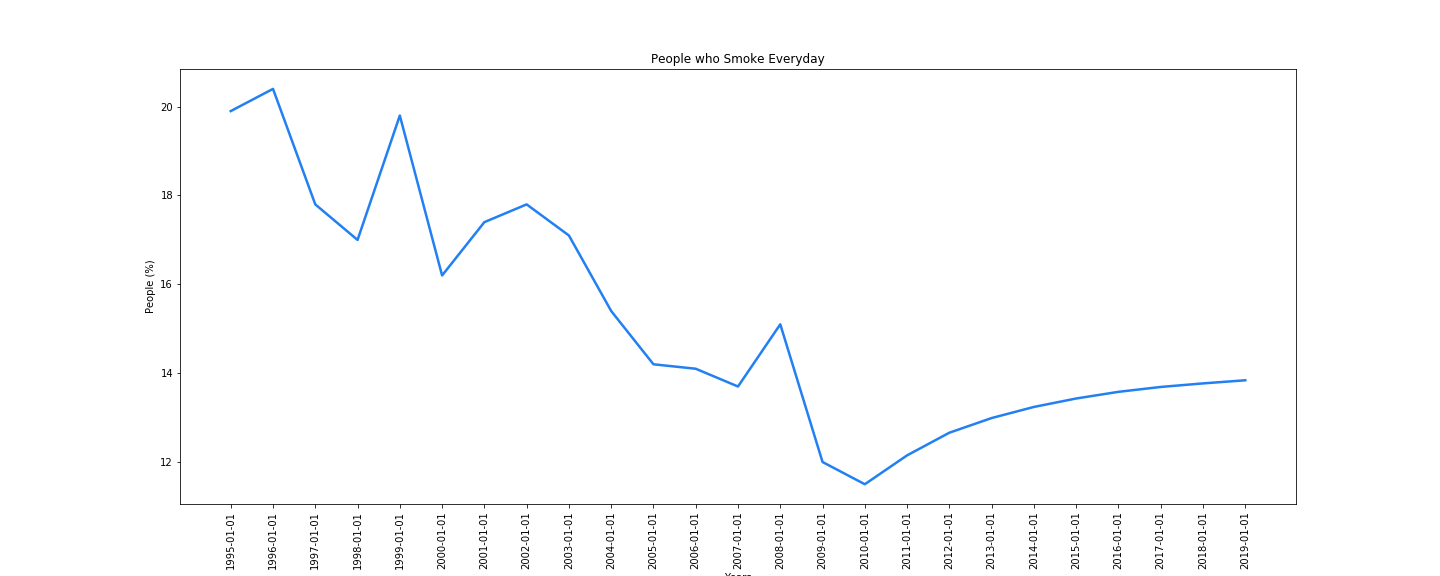

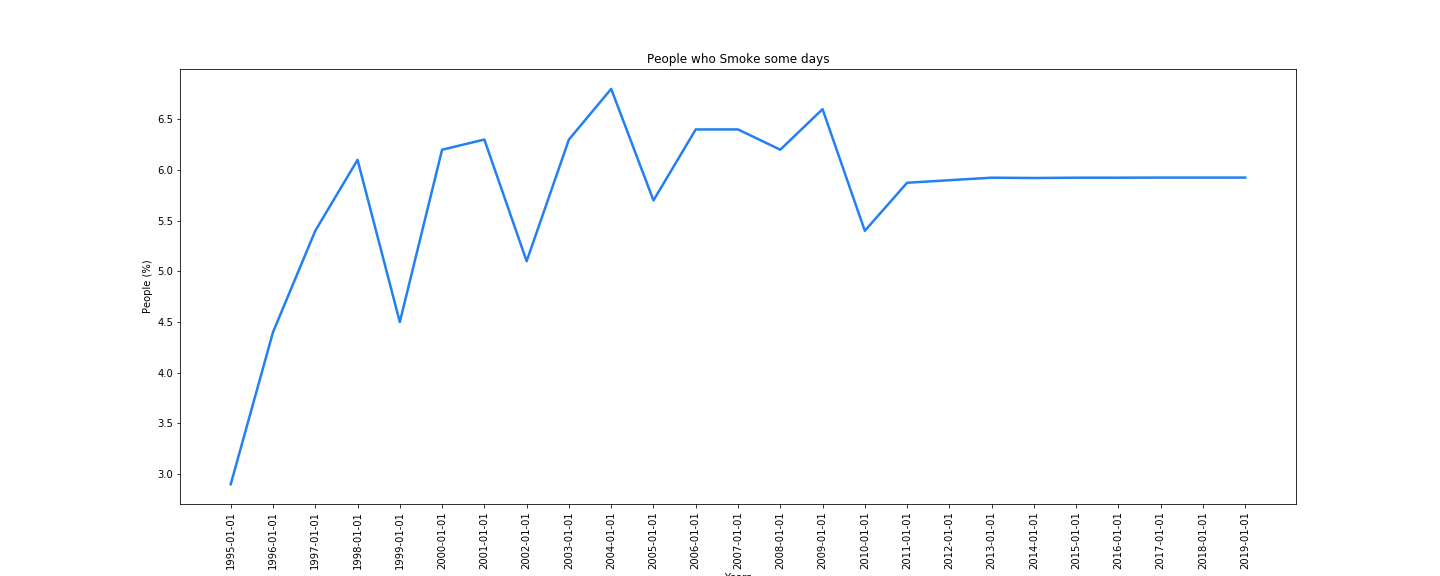

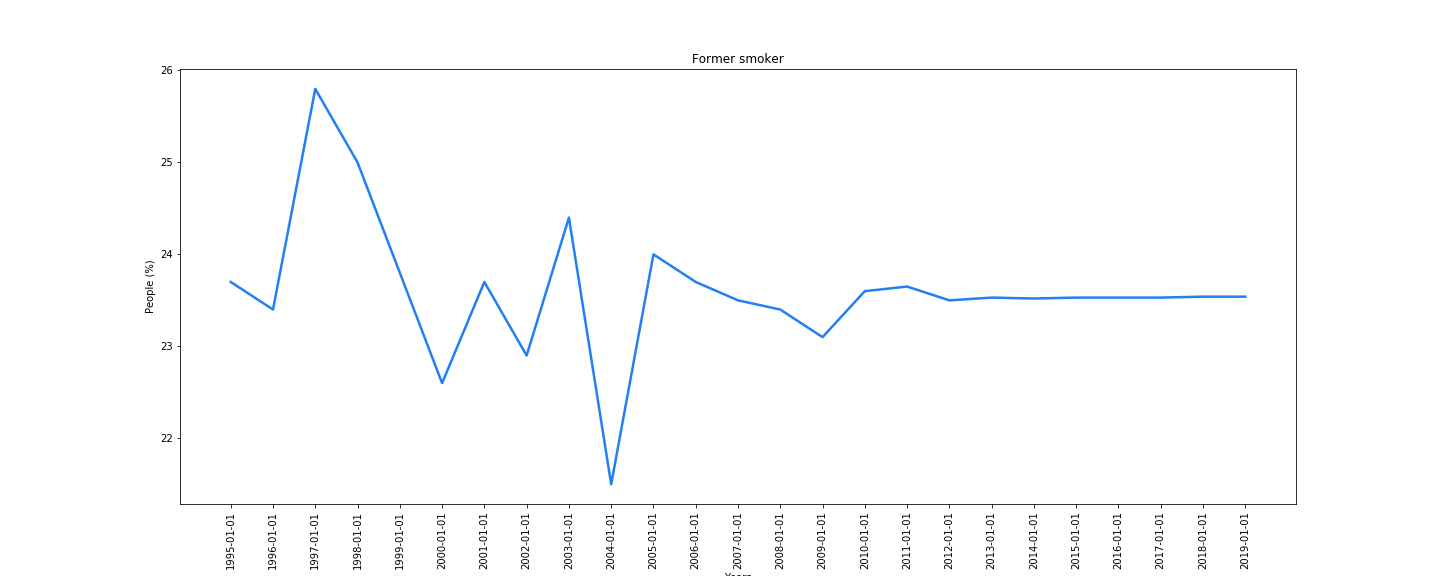

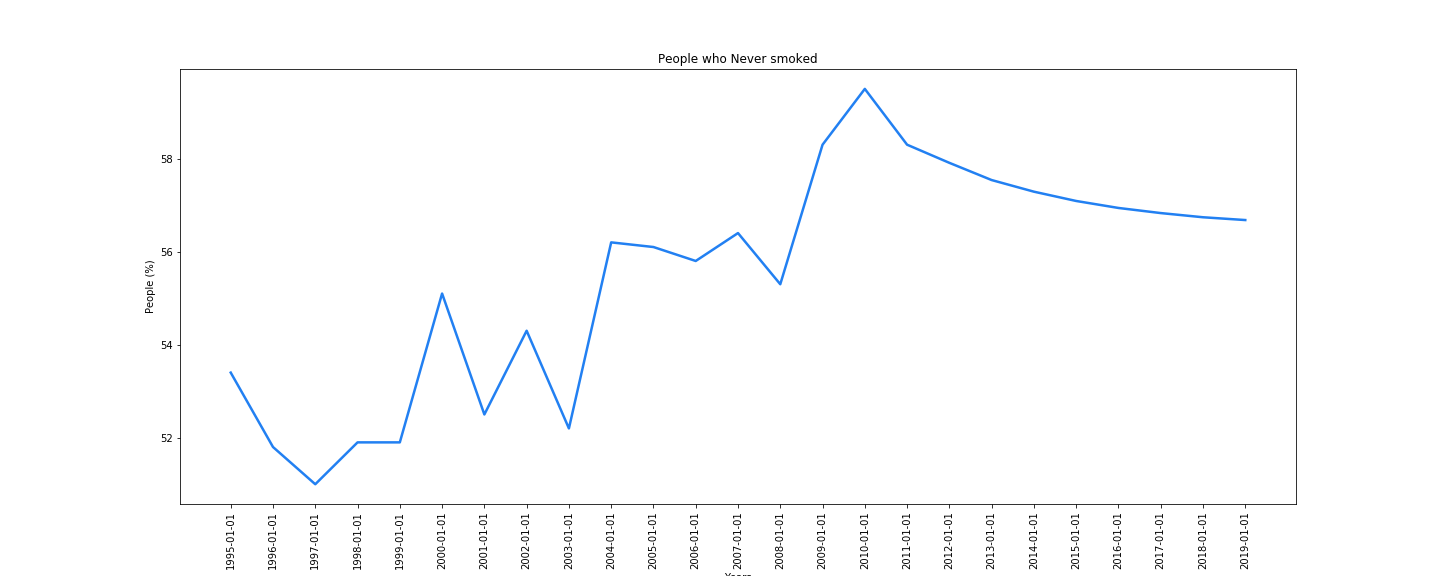

In [62]:
state = 'Illinois'
getInfo(state)